In [1]:
#Global Header File

using LinearAlgebra             #   Linear Algebra 
using Kronecker                 #   For Kronecker Product 
using MKL                       #   MKL
using Plots, PyPlot             #   Plot Modules
using Random, Distributions     #   Random RandomMatrices
using RandomMatrices            #   Random Matrtices
using CSV, DelimitedFiles       #   File Management stuff
using DataFrames                #   File Management 
using ITensors
#using ITensorsVisualization     #   Packages for ITensors

In [2]:
#Defining the Basic Gates



#The X,Y,Z gates:

X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];

# The Hadamard and the Phase Gates:

H=1/sqrt(2)*[1 1 ; 1 -1];
S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];


#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*X)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end


#The two-body gates:

CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

In [3]:
#The Duality Module


Udual=fill(0.0*im, Distributions.dim(A),Distributions.dim(A))'
for i in 1:Distributions.dim(A)
    for j in 1:Distributions.dim(A)
        Udual[i,j]=

In [4]:
#Constructing the background Z field

h=rand(12)*2*pi;
ZRow=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6]),RZ(h[7]),RZ(h[8]),RZ(h[9]),RZ(h[10]),RZ(h[11]),RZ(h[12])));


In [5]:
# Constructing the X Kicks 

epsilon=0.0;               #Introducing the Imperfection in kicks
g=pi-epsilon;
#XRow=copy(kronecker(X,X,X,X,X,X,X,X,X,X,X,X));
XRow=copy(kronecker(RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g),RX(g)));

In [6]:
#Constructing the Random Brickwall 


J=rand(11)*pi/2;             #Ising Even Disorder on the two body gates

fonez=copy(kronecker(Z,Z))
ftwox=copy(kronecker(X,X));  #For the two body XX+YY gates
ftwoy=copy(kronecker(Y,Y));

thetamean=0.3;
thetadev=pi/50;
theta=thetamean+rand(1)[]*thetadev;
                             #Interaction

delh=rand(4)*pi/50;          #Imperfection in Z tuning


FU=fill(fill(0.1+im, 4,4), 11);


    for j in 1:length(FU)
        int1=kronecker(RZ(delh[1]),RZ(delh[2]));
        int2=exp(-im*J[j]*fonez-im*theta/2*(ftwox+ftwoy));
        int3=kronecker(RZ(delh[3]),RZ(delh[4]));

        FU[j]=int3*int2*int1;
    end


    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[7],FU[8],FU[9],FU[10],FU[11],I(2)));

    #Note this has open boundary condition

A=XRow*UEven*UOdd;

#Writing CSV




In [8]:
Distributions.dim(A)

4096

In [33]:
# Computing the Eigenstatistics     
    
EigA=eigvals(A);

N=fill(0.1,length(EigA))
N=angle.(EigA);

N= sort(N,rev=true);


EigA1=copy(N);
ls = deleteat!(EigA1,1);
la = deleteat!(N,length(N));
m=copy(la-ls)/mean(la-ls)

#histogram(m)

4095-element Vector{Float64}:
 0.31388814472149873
 0.2462013961310636
 0.37495373534489235
 0.5645234900331
 1.0421521564930185
 1.9096711794820747
 0.8755733146012451
 1.2480371454682249
 0.7167453613387429
 6.154848321264025
 0.7947755025924821
 0.33079541917622535
 0.8454836541250526
 ⋮
 0.10647519919190158
 0.9008488626403113
 0.9621763934165353
 0.148003376218526
 1.5335829753711883
 0.7579043627759903
 0.5506321843536892
 0.8663508592958568
 0.7946439569554768
 2.1391990365639866
 1.8535655953995536
 0.6128821659805426

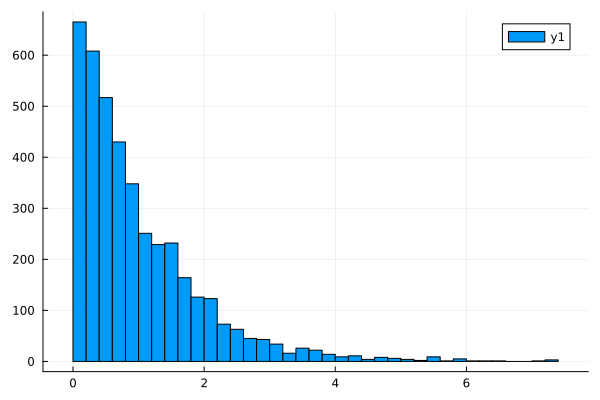

In [34]:
histogram(m)

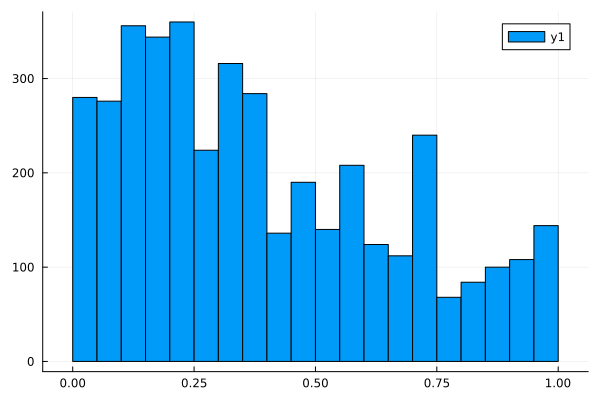

In [13]:
#Computing the order Parameter

n=fill(0.1,length(EigA)-2);

for i in 1:length(n)
    #n[i]=m[i+1]/m[i];
    n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
end

histogram(n)

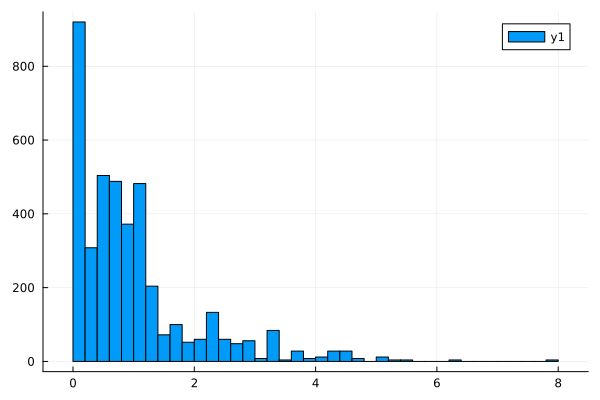

In [12]:
histogram(m)

In [14]:
mean(n)

0.3915505839470259

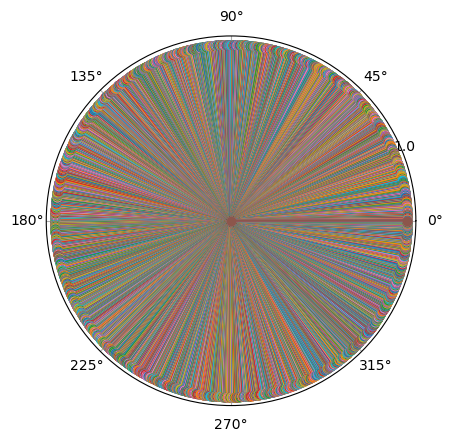

4096-element Vector{Vector{PyCall.PyObject}}:
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB2620>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB3D00>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB3E80>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0040>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF01C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0340>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF04C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0640>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF07C0>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0940>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB2D70>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BB1060>]
 [PyObject <matplotlib.lines.Line2D object at 0x0000000090BF0880>]
 ⋮
 [PyObject <matplotlib.lines.Line2D object at 0x00000000ADD474C0>]
 [PyObject <m

In [ ]:
# Eigenspectra

#polar.(Base.vect.(0.0,angle.(EigA)),Base.vect.(0.0,abs.(EigA)),marker="o")

In [ ]:
#Print Statements:

CSV.write("U_theta_$(thetamean)_g_$(epsilon)_Itr_0.csv", Tables.table(A), writeheader=false);
CSV.write("m_theta_$(thetamean)_g_$(epsilon)_Itr_0.csv", Tables.table(m), writeheader=false);
CSV.write("n_theta_$(thetamean)_g_$(epsilon)_Itr_0.csv", Tables.table(n), writeheader=false);



DTC

In [ ]:
Zi=fill(fill(0.1+im, 4096,4096), 12);



Zi[1]=copy(kronecker(Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[2]=copy(kronecker(I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[3]=copy(kronecker(I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[4]=copy(kronecker(I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[5]=copy(kronecker(I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[6]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2),I(2)));
Zi[7]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2),I(2)));
Zi[8]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2),I(2)));
Zi[9]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2),I(2)));
Zi[10]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2),I(2)));
Zi[11]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z,I(2)));
Zi[12]=copy(kronecker(I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),Z));

In [ ]:
Cii=fill(0.1, 12,25);

In [ ]:
At=I(4096)
Atdag=I(4096)
Adag=conj(transpose(A))

for t in 1:25
   # for l in 1:12
        LM=copy(Zi[5]*Atdag*Zi[5]*At);
        Cii[5,t]=real(LM[1365,1365]);
  #  end
    At=A*At;
    Atdag=Atdag*Adag;
end

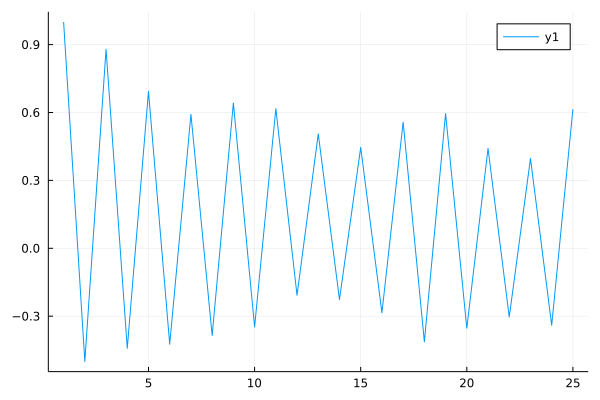

In [ ]:
xax=1:25
Plots.plot(xax,Cii[5,:])

Exporting Plots:

In [36]:

gr();
 
#plot
#histogram(n)
xax=1:25
Plots.plot(xax,Cii[5,:])
#save plot
Plots.savefig("fig/DTC-Vedika-MBL-g_pi_3-r.png")

LoadError: UndefVarError: Cii not defined

In [37]:
#Print Stamenets for Correlators

CSV.write("Corr_theta_$(thetamean)_g_$(epsilon)_Itr_0.csv", Tables.table(Cii[5,:]), writeheader=false);


Eigenvectors

In [ ]:
     
    
EigvecA=eigvecs(A);

In [ ]:
SigX=copy(kronecker(X,I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2),I(2)));

In [ ]:
str=conj(transpose(EigvecA))*SigX*EigvecA

4096×4096 Matrix{ComplexF64}:
    -0.444583+1.51788e-17im  …    9.74996e-7+1.49114e-8im
   4.95761e-5-0.000280632im        1.2062e-7-6.26686e-7im
  0.000399237+0.000252938im        8.1658e-6+5.3502e-6im
  0.000160307+8.44409e-5im       -5.62104e-7-3.07157e-7im
   3.55693e-5+3.59886e-5im        6.17425e-6+6.44113e-6im
  -6.45803e-5-8.28008e-5im   …    2.23949e-5+2.96369e-5im
  -3.13269e-6-5.82169e-6im       -2.08135e-5-4.01383e-5im
   0.00019928-8.15371e-5im       -2.03994e-6+7.98463e-7im
   0.00148794-0.00146228im        1.22546e-5-1.16803e-5im
    8.1501e-5+0.000181598im      -7.99891e-7-1.85784e-6im
 -0.000195978-1.33531e-5im   …   -7.80371e-5-6.51738e-6im
  0.000105031+0.000210575im       -5.6017e-6-1.16744e-5im
   7.97719e-6+8.55445e-7im        8.86656e-5+1.08821e-5im
             ⋮               ⋱              ⋮
   8.47426e-7-6.16905e-7im      -0.000109943+7.74914e-5im
  -1.11131e-5+1.54408e-6im   …  -0.000120168+1.48271e-5im
  -1.54479e-7-6.09888e-7im        1.06193e-5+4.47924e-5

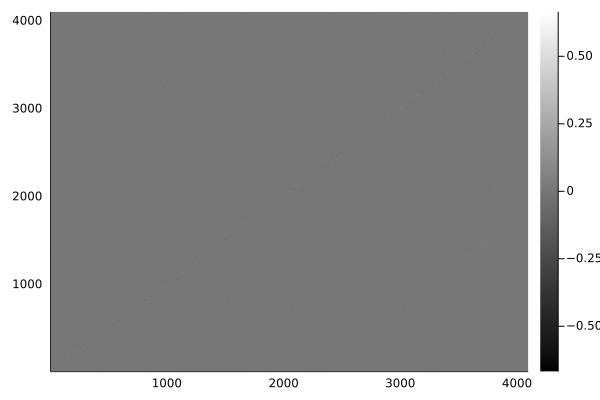

In [ ]:
heatmap(real.(str), color = :greys) 

In [21]:
thetamean=2;
thetadev=pi/50;
thetamean+rand(1)[]*thetadev

2.0214812254584418

In [21]:
Amm=copy(kronecker(X,X));
A=exp(-im*2*Amm);



In [23]:

A1=reshape(A,floor(Int,sqrt(Distributions.dim(A))),floor(Int,sqrt(Distributions.dim(A))),floor(Int,sqrt(Distributions.dim(A))),floor(Int,sqrt(Distributions.dim(A))));
A2=fill(0.0*im,floor(Int,sqrt(Distributions.dim(A))),floor(Int,sqrt(Distributions.dim(A))),floor(Int,sqrt(Distributions.dim(A))),floor(Int,sqrt(Distributions.dim(A))) )
for a in 1:floor(Int,sqrt(Distributions.dim(A)))
    for b in 1:floor(Int,sqrt(Distributions.dim(A)))
        for c in 1:floor(Int,sqrt(Distributions.dim(A)))
            for d in 1:floor(Int,sqrt(Distributions.dim(A)))
                A2[a,b,c,d]=copy(A1[a,c,b,d]);
            end
        end
    end
end

Udual=reshape(A2,floor(Int,Distributions.dim(A)),floor(Int,Distributions.dim(A)))



4×4 Matrix{ComplexF64}:
 -0.416147-0.0im  0.0+0.0im       0.0+0.0im       -0.416147-0.0im
       0.0+0.0im  0.0-0.909297im  0.0-0.909297im        0.0+0.0im
       0.0+0.0im  0.0-0.909297im  0.0-0.909297im        0.0+0.0im
 -0.416147-0.0im  0.0+0.0im       0.0+0.0im       -0.416147-0.0im

In [25]:
A=exp(-im*2*Amm)

4×4 Matrix{ComplexF64}:
 -0.416147-0.0im             0.0+0.0im       …        0.0-0.909297im
       0.0+0.0im       -0.416147-0.0im                0.0+0.0im
       0.0+0.0im             0.0-0.909297im           0.0+0.0im
       0.0-0.909297im        0.0+0.0im          -0.416147-0.0im